## Insurance Forecast - Medical Cost Personal 

Dataset obtained from Kaggle at https://www.kaggle.com/datasets/mirichoi0218/insurance

- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

In [295]:
import pandas as pd

In [296]:
medical_cost_df = pd.read_csv('data/insurance.csv')

## DATA ANALYSIS

In [297]:
medical_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [298]:
medical_cost_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [299]:
medical_cost_df.notna().sum()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [300]:
medical_cost_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Must get low cardinality categorical data

In [301]:
categorical_cols \
    = [cat_cols for cat_cols in medical_cost_df.columns \
       if medical_cost_df[cat_cols].dtype == 'object' and medical_cost_df[cat_cols].nunique() <= 10]

In [302]:
categorical_cols

['sex', 'smoker', 'region']

In [303]:
numerical_cols = [num_cols for num_cols in medical_cost_df.columns if medical_cost_df[num_cols].dtype != 'object']

In [304]:
numerical_cols

['age', 'bmi', 'children', 'charges']

In [305]:
target_col = 'charges'

## DATA VISUALIZATION

In [306]:
import seaborn as sns

<AxesSubplot:xlabel='region', ylabel='charges'>

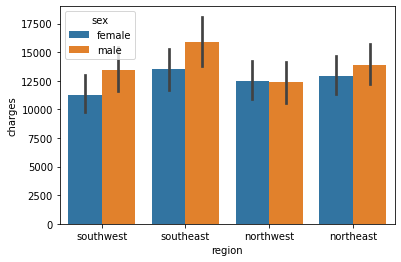

In [307]:
sns.barplot(data=medical_cost_df, x='region', y='charges', hue='sex')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

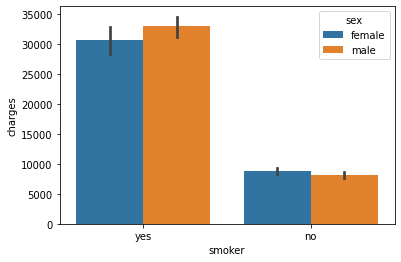

In [308]:
sns.barplot(data=medical_cost_df, x='smoker', y='charges', hue='sex')

In [309]:
medical_cost_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


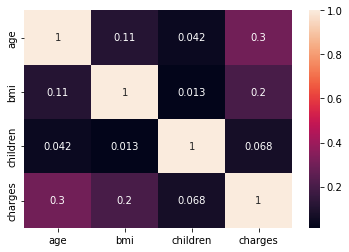

In [310]:
sns.heatmap(data=medical_cost_df.corr(), annot=True);

<AxesSubplot:xlabel='bmi', ylabel='charges'>

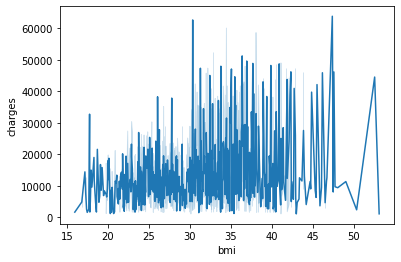

In [311]:
sns.lineplot(data=medical_cost_df, x="bmi", y="charges")

<AxesSubplot:xlabel='age', ylabel='charges'>

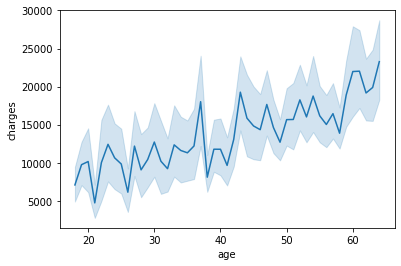

In [312]:
sns.lineplot(data=medical_cost_df, x="age", y="charges")

<AxesSubplot:xlabel='children', ylabel='charges'>

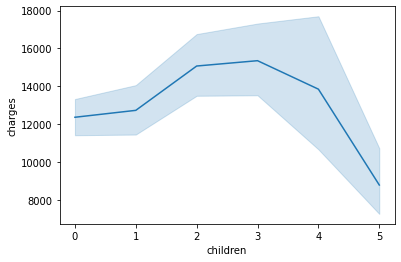

In [313]:
sns.lineplot(data=medical_cost_df, x="children", y="charges")

## Must split data into train and test

In [314]:
X_train = medical_cost_df.sample(frac=0.8, random_state=40)
X_test = medical_cost_df.drop(X_train.index)

In [315]:
print('X_train number of samples: {}\nX_test number of samples: {}'.format(X_train.shape[0], X_test.shape[0]))

X_train number of samples: 1070
X_test number of samples: 268


In [316]:
y_train = X_train[target_col]
X_train.drop(target_col, axis=1, inplace=True)
y_test = X_test[target_col]
X_test.drop(target_col, axis=1, inplace=True)

In [317]:
print('y_train number of samples: {}\ny_test number of samples: {}'.format(y_train.shape[0], y_test.shape[0]))

y_train number of samples: 1070
y_test number of samples: 268


## Must transform categorical data

In [318]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [319]:
# X_train = pd.get_dummies(X_train, categorical_cols, drop_first=True)
ohe_train = pd.DataFrame(ohe.fit_transform(X_train[categorical_cols]))
ohe_test = pd.DataFrame(ohe.transform(X_test[categorical_cols]));

In [320]:
X_train.head()

,age,sex,bmi,children,smoker,region
1099,25,female,33.99,1,no,southeast
759,18,male,38.17,0,yes,southeast
215,41,female,37.10,2,no,southwest
903,49,male,36.85,0,no,southeast
989,24,female,20.52,0,yes,northeast


In [321]:
# ohe removes index
ohe_train.index = X_train.index
ohe_test.index = X_test.index

In [322]:
ohe_train.columns = ohe.get_feature_names_out()
ohe_test.columns = ohe.get_feature_names_out()

In [323]:
display(ohe_train.head())

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1099,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
759,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
215,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
903,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
989,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [324]:
display(X_train[categorical_cols].head())

,sex,smoker,region
1099,female,no,southeast
759,male,yes,southeast
215,female,no,southwest
903,male,no,southeast
989,female,yes,northeast


In [325]:
X_train.drop(categorical_cols, axis=1, inplace=True)
X_train = pd.concat([X_train, ohe_train], axis=1)

In [326]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1099,25,33.99,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
759,18,38.17,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
215,41,37.10,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
903,49,36.85,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
989,24,20.52,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [327]:
X_test.drop(categorical_cols, axis=1, inplace=True)
X_test = pd.concat([X_test, ohe_test], axis=1)

In [328]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
7,37,27.740,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
17,23,23.845,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
21,30,32.400,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
24,37,28.025,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
32,19,28.600,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [329]:
data_processed.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Must normalize numerical data

In [330]:
from sklearn.preprocessing import StandardScaler;

In [331]:
std_scale = StandardScaler()

In [332]:
if 'charges' in numerical_cols:
    numerical_cols.remove('charges') # charges is the target.
else:
    print('Was removed')

### Before

<AxesSubplot:>

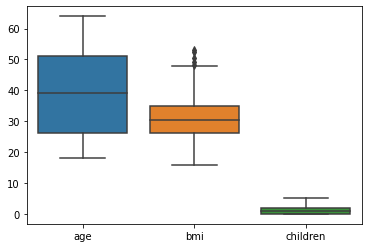

In [333]:
sns.boxplot(data=X_train[numerical_cols])

<AxesSubplot:>

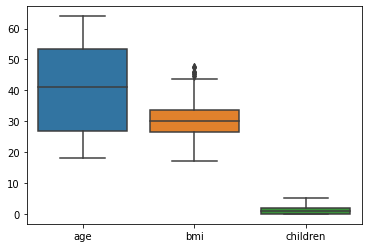

In [334]:
sns.boxplot(data=X_test[numerical_cols])

In [335]:
X_train.loc[:, numerical_cols] = std_scale.fit_transform(X_train[numerical_cols])
X_test.loc[:, numerical_cols] = std_scale.transform(X_test[numerical_cols])

### After

<AxesSubplot:>

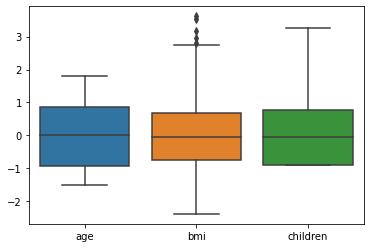

In [336]:
sns.boxplot(data=X_train[numerical_cols])

<AxesSubplot:>

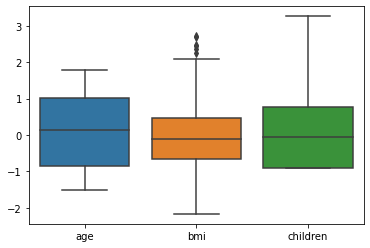

In [337]:
sns.boxplot(data=X_test[numerical_cols])

I Could do: X_train[numerical_cols] = (X_train[numerical_cols] - X_train[numerical_cols].mean()) / X_train[numerical_cols].std()

## Building model using Keras

In [338]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping 

In [339]:
stop = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [340]:
X_train.shape[1]

11

In [341]:
model = keras.models.Sequential(
    [
        layers.Dense(27, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(50, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(1), # output layer
    ]
)

In [342]:
model.compile(optimizer='adam', loss='mean_squared_error')

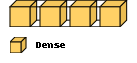

In [343]:
import visualkeras
visualkeras.layered_view(model, legend=True) 

In [344]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=200, verbose=True, callbacks=[stop])

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 311395744.0000 - val_loss: 367329536.0000
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 311139904.0000 - val_loss: 366729824.0000
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 309786464.0000 - val_loss: 363801504.0000
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 304697920.0000 - val_loss: 353877952.0000
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 289676480.0000 - val_loss: 328599424.0000
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 257923328.0000 - val_loss: 280915360.0000
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 209565360.0000 - val_loss: 216865584.0000
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 159243056.0000 - val_loss: 165369488.0000
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 1296801

34/34 [==============================] - 0s 7ms/step - loss: 24677116.0000 - val_loss: 34623660.0000
Epoch 73/200
34/34 [==============================] - 0s 7ms/step - loss: 24552010.0000 - val_loss: 34321372.0000
Epoch 74/200
34/34 [==============================] - 0s 6ms/step - loss: 24388140.0000 - val_loss: 34216172.0000
Epoch 75/200
34/34 [==============================] - 0s 5ms/step - loss: 24343088.0000 - val_loss: 34055364.0000
Epoch 76/200
34/34 [==============================] - 0s 6ms/step - loss: 24163926.0000 - val_loss: 33971032.0000
Epoch 77/200
34/34 [==============================] - 0s 6ms/step - loss: 24100268.0000 - val_loss: 33758152.0000
Epoch 78/200
34/34 [==============================] - 0s 6ms/step - loss: 23991548.0000 - val_loss: 33736976.0000
Epoch 79/200
34/34 [==============================] - 0s 6ms/step - loss: 23828834.0000 - val_loss: 33682832.0000
Epoch 80/200
34/34 [==============================] - 0s 4ms/step - loss: 23797058.0000 - val_loss: 3

34/34 [==============================] - 0s 3ms/step - loss: 21035734.0000 - val_loss: 29982148.0000
Epoch 144/200
34/34 [==============================] - 0s 3ms/step - loss: 21057482.0000 - val_loss: 30148862.0000
Epoch 145/200
34/34 [==============================] - 0s 3ms/step - loss: 21024834.0000 - val_loss: 30119110.0000
Epoch 146/200
34/34 [==============================] - 0s 3ms/step - loss: 21020986.0000 - val_loss: 30148174.0000
Epoch 147/200
34/34 [==============================] - 0s 3ms/step - loss: 20996762.0000 - val_loss: 30038146.0000
Epoch 148/200
34/34 [==============================] - 0s 2ms/step - loss: 21010214.0000 - val_loss: 30133778.0000
Epoch 149/200
34/34 [==============================] - 0s 2ms/step - loss: 21078902.0000 - val_loss: 30157480.0000
Epoch 150/200
34/34 [==============================] - 0s 2ms/step - loss: 20977998.0000 - val_loss: 30087018.0000
Epoch 151/200
34/34 [==============================] - 0s 2ms/step - loss: 20972084.0000 - val

In [345]:
import matplotlib.pyplot as plt

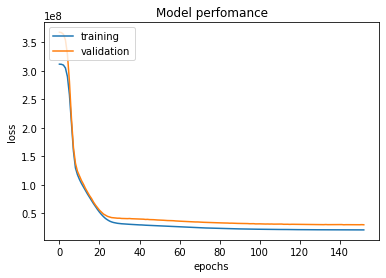

In [346]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model perfomance')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [347]:
pred = model.predict(X_test)

In [348]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [349]:
print('R2: {}'.format(r2_score(y_test, pred)))

R2: 0.8144821453030233


In [350]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, pred))))

RMSE: 5475.595855834883
